### Limb darkening

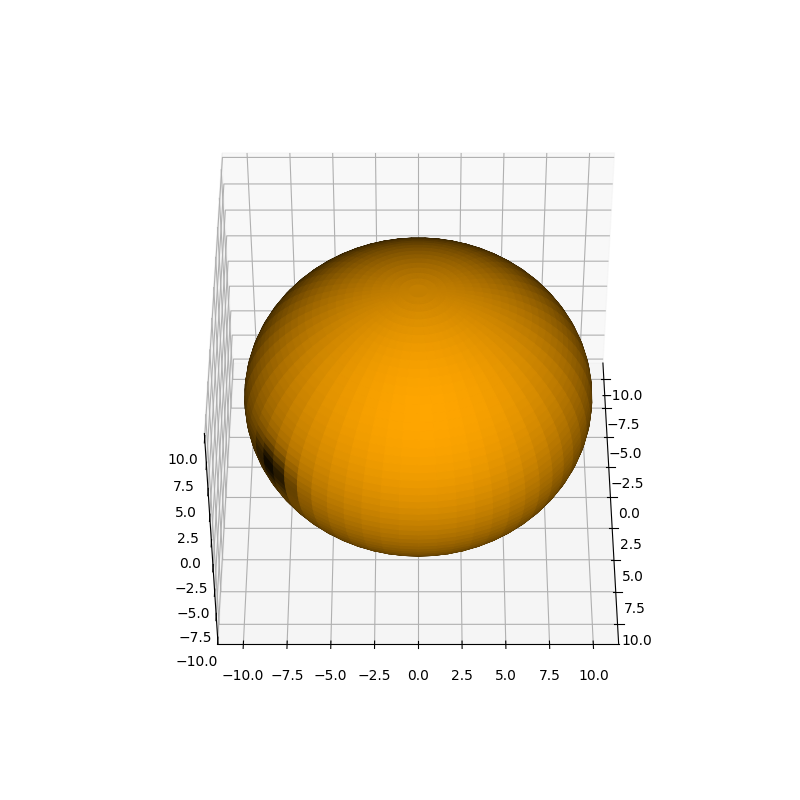

In [2]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

# Parameters
r = 10#---->radii
res = 60#---->resolution

# Making a Grid
theta = np.linspace(0, 2*np.pi, res)
phi = np.linspace(0, np.pi, res)
theta_mesh, phi_mesh = np.meshgrid(theta, phi)

# spherical to cartessian
x = r * np.sin(phi_mesh) * np.cos(theta_mesh)
y = r * np.sin(phi_mesh) * np.sin(theta_mesh)
z = r * np.cos(phi_mesh)

# Color
texture = np.ones((res, res, 4))
texture[:, :, 0:3] = [1.0, 0.65, 0]
texture[:, :, 3] = 1

# Parameter of the spot
spot_theta_deg = 300 #------>longitude
spot_phi_deg   = 90#------>latitude
spot_radius_deg = 15#------>radii of the spot

spot_theta_rad = np.deg2rad(spot_theta_deg)
spot_phi_rad   = np.deg2rad(spot_phi_deg)
spot_radius_rad = np.deg2rad(spot_radius_deg)

elev = 45 #----->we choose our elevation
azim = 0  #----->we choose our azimut

#------->convert to radian
elev_rad = np.deg2rad(elev)
azim_rad = np.deg2rad(azim)


# convert the elevation on a our point of view(radians)
v_x = np.cos(elev_rad) * np.cos(azim_rad)
v_y = np.cos(elev_rad) * np.sin(azim_rad)
v_z = np.sin(elev_rad)

#------->create an array if I need in future(don pay attention to this)
#viewer = np.array([v_x, v_y, v_z])

#------->plotting sphere

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.set_axis_off()
ax.view_init(elev=elev, azim=azim,vertical_axis="z") 



#------>coefficient of limb darkening

u = 0.8

# limb darkening depending of the point of view you can play with the elevation and azimut and in theory will look the
#same limb darkening

mu = (x * v_x + y * v_y + z * v_z) / r

mu = np.clip(mu, 0, 1)

# Aplicar limb darkening a la textura base
for c in range(3):  # R, G, B
    texture[:,:, c] *= (1 - u * (1 - mu))


# Distance of spot to avoid loosing properties passing through 0 or 360
delta_theta = np.abs(theta_mesh - spot_theta_rad)
delta_theta = np.minimum(delta_theta, 2*np.pi - delta_theta)

# same with latitude but i dont think we will use
delta_phi = np.abs(phi_mesh - spot_phi_rad)

# total distance
distance_squared = (delta_theta**2 + delta_phi**2)
sigma_squared = (spot_radius_rad / 2)**2

# Gausian mask
spot_mask = np.exp(-distance_squared / (2 * sigma_squared))

# Putting color
texture[:, :, 0:3] *= (1 - 0.9 * spot_mask[:, :, np.newaxis])

#Draw sphere
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=texture, shade=False)









plt.show()


### simetry and limb darkening fixed

choose elevation point of view 0
choose azimut point of view 33


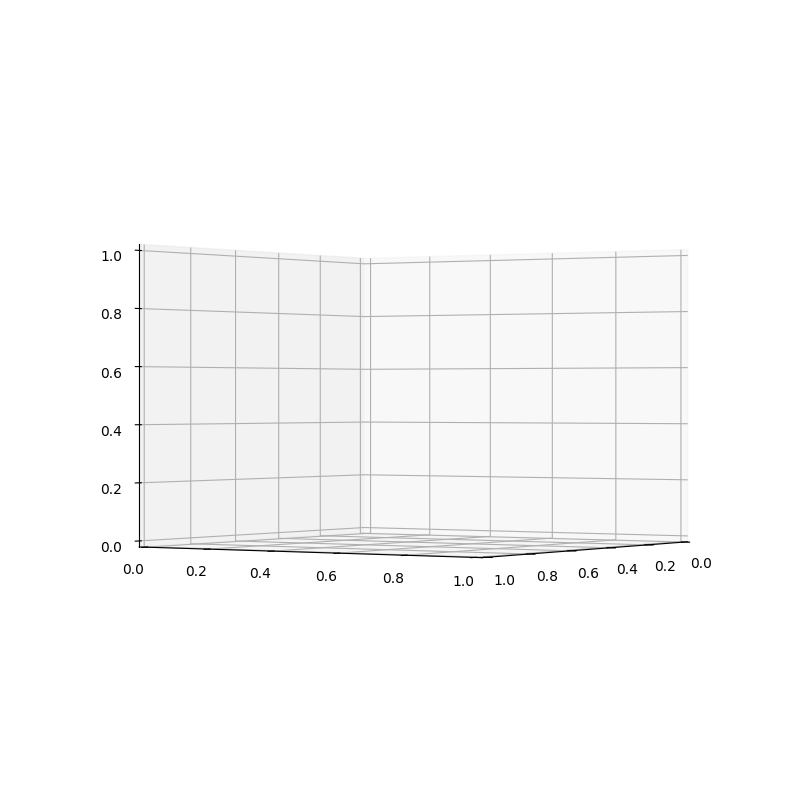

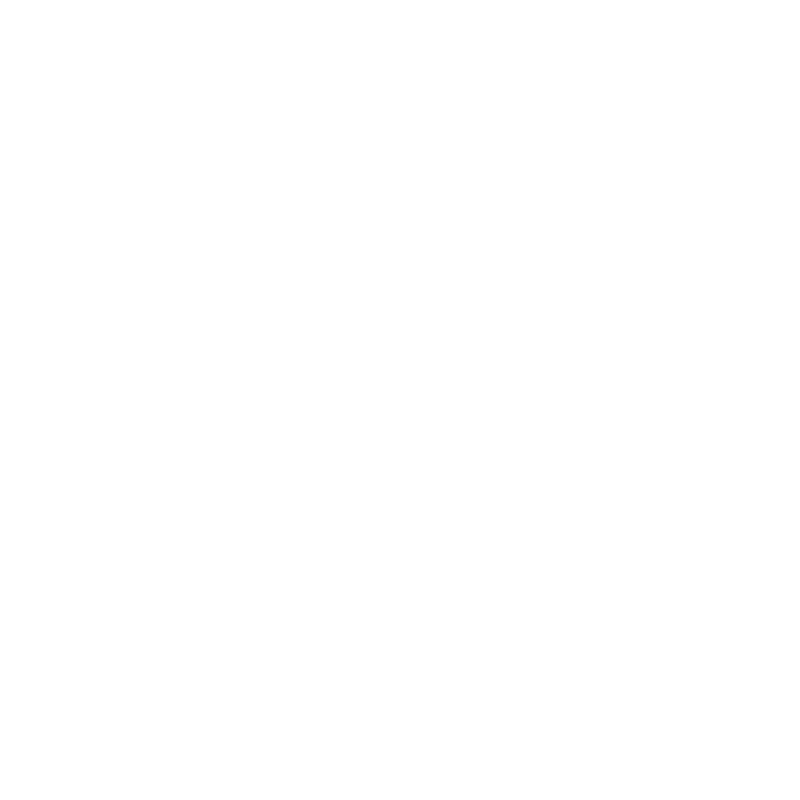

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

# Parameters
r = 10#---->radii
res = 60#---->resolution

# Making a Grid
theta = np.linspace(0, 2*np.pi, res)
phi = np.linspace(0, np.pi, res)
theta_mesh, phi_mesh = np.meshgrid(theta, phi)

# spherical to cartessian
x = r * np.sin(phi_mesh) * np.cos(theta_mesh)
y = r * np.sin(phi_mesh) * np.sin(theta_mesh)
z = r * np.cos(phi_mesh)

# Color
base_texture = np.ones((res, res, 4))
base_texture[:, :, 0:3] = [1.0, 0.65, 0]
base_texture[:, :, 3] = 1

# Parameter of the spot
spot_theta_deg = 0 #------>longitude
spot_phi_deg   = 35#------>latitude
spot_radius_deg = 15#------>radii of the spot

spot_theta_rad = np.deg2rad(spot_theta_deg)
spot_phi_rad   = np.deg2rad(spot_phi_deg)
spot_radius_rad = np.deg2rad(spot_radius_deg)

# Graficar esfera
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_off()

elev = int(input('choose elevation point of view')) #----->we choose our elevation
azim = int(input('choose azimut point of view'))  #----->we choose our azimut


#------->convert to radian
elev_rad = np.deg2rad(elev)
azim_rad = np.deg2rad(azim)


# convert the elevation on a our point of view(radians)
v_x = np.cos(elev_rad) * np.cos(azim_rad)
v_y = np.cos(elev_rad) * np.sin(azim_rad)
v_z = np.sin(elev_rad)

#------->create an array if I need in future(don pay attention to this)
#viewer = np.array([v_x, v_y, v_z])

#------->plotting sphere

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.set_axis_off()

ax.view_init(elev=elev, azim=azim,vertical_axis="z") 




u = 0.8  #------>coefficient of limb darkening

# limb darkening depending of the point of view you can play with the elevation and azimut and in theory will look the
#same limb darkening

mu = (x * v_x + y * v_y + z * v_z) / r

mu = np.clip(mu, 0, 1)

# Aplicar limb darkening a la textura base
for c in range(3):  # R, G, B
    base_texture[:,:, c] *= (1 - u * (1 - mu))

#animation

def animate(i):
    ax.clear()
    ax.set_axis_off()

    # Reebot texture
    texture = np.copy(base_texture)

    # ------>rotating Spot
    spot_theta_rad = np.deg2rad(spot_theta_deg) + (2*np.pi*i/120)  # <-- aquí se mueve con i

    # Angular distance
    delta_theta = np.abs(theta_mesh - spot_theta_rad)
    delta_theta = np.minimum(delta_theta, 2*np.pi - delta_theta)

    #Angular Distance in latitud(we dont need this)
    delta_phi = np.abs(phi_mesh - spot_phi_rad)
    
    # Total distance
    distance_squared = (delta_theta**2 + delta_phi**2)
    sigma_squared = (spot_radius_rad / 2)**2
    
    # Gaussian Mask
    spot_mask = np.exp(-distance_squared / (2 * sigma_squared))
    
    # Color Texture
    texture[:, :, 0:3] *= (1 - 0.9 * spot_mask[:, :, np.newaxis])

    # Plotting sphere
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=texture, shade=False)

    return [surf]







ani = animation.FuncAnimation(fig, animate, frames=120, interval=50, blit=False)
plt.show()
